# Santos, Santos, Pacheco Results #
The results achieved in the simulations by SSP (Santos Santos Pachecho) in their paper *Social Norms of Cooperation in Small-Scale Societies* can be seen in the following graph.


<img src="http://journals.plos.org/ploscompbiol/article/figure/image?size=large&id=info:doi/10.1371/journal.pcbi.1004709.g001"/>

One can see an almost constant cooperation index for population sizes greater than 50 for Stern Judging, Shunning, and Image Score. While Simple Standing increases steadily over the range 50-300.

Below we will be performing the same simulation and plotting the results in order to verify and compare the simulations results and those of the paper.

First however let us define the social norms we will use as well as a function to pass varying population sizes and social norms for retrieving the results.

In [30]:
%pylab inline
%load_ext autoreload
%autoreload 2

import SimulationInstance
import SimulationInstanceVectorized

SternJudging = [[1, 0 ],
                [0, 1]]
SimpleStanding = [[1, 1],
                  [0, 1]]
Shunning = [[1, 0],
            [0, 1]]
ImageScore = [[1, 1],
              [0, 0]]

def SSP(population_size, socialnorm):
    runs = 3
    generations = 3*np.power(10, 3)
    mutation_rate = np.power(10*population_size, -1)

    execution_error = 0.08
    reputation_assignment_error = 0.01
    private_assessment_error = 0.01
    reputation_update_probability = 0.2
    randomseed = np.random.randint(999999)
    cost = 1
    benefit = 5
    coop_index = SimulationInstanceVectorized.run_instance(runs, generations, population_size,
        mutation_rate, execution_error, reputation_assignment_error, private_assessment_error,
        reputation_update_probability, randomseed, socialnorm,
        cost, benefit)
    return coop_index

Populating the interactive namespace from numpy and matplotlib
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Now let us retrieve the results for populations in the ranges 10-150, with simulations at every multiple of 10, and then simulations at multiples of 25 from 150-300. 

Let's begin with the social norm of Stern Judging.

In [27]:
population_sizes = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150,
                    175, 200, 225, 250, 275, 300]

In [38]:
stern_judging_results = [[SSP(size, SternJudging), size] for size in population_sizes]

Cooperation index: 0.6012597222222222
Cooperation index: 0.83649375
Cooperation index: 0.2972842592592593
Cooperation index: 0.8003260416666667
Cooperation index: 0.7811016666666667
Cooperation index: 0.532906712962963
Cooperation index: 0.7431013888888889
Cooperation index: 0.6794215277777778
Cooperation index: 0.7597783950617284
Cooperation index: 0.7415354166666667
Cooperation index: 0.4669724747474748
Cooperation index: 0.5246200231481482
Cooperation index: 0.5403447649572649
Cooperation index: 0.6134109126984127
Cooperation index: 0.5140366666666667
Cooperation index: 0.18585960317460318
Cooperation index: 0.3279549305555556
Cooperation index: 0.6264133333333334
Cooperation index: 0.2291467222222222
Cooperation index: 0.3396673737373737
Cooperation index: 0.4414544907407407


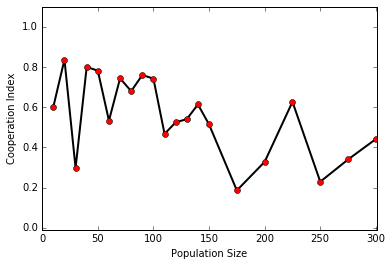

[ 0.60125972  0.83649375  0.29728426  0.80032604  0.78110167  0.53290671
  0.74310139  0.67942153  0.7597784   0.74153542  0.46697247  0.52462002
  0.54034476  0.61341091  0.51403667  0.1858596   0.32795493  0.62641333
  0.22914672  0.33966737  0.44145449]
[  10.   20.   30.   40.   50.   60.   70.   80.   90.  100.  110.  120.
  130.  140.  150.  175.  200.  225.  250.  275.  300.]


In [73]:
stern_judging_results = np.array(stern_judging_results)
x = stern_judging_results[:,0]
y = stern_judging_results[:,1]
plot = plt.plot(y, x, 'k', y, x, 'ro', linewidth=2.0)
plt.ylim((-0.01, 1.1))
plt.xlim((-0.01, 301))
#plt.setp(plot, color='r')
plt.ylabel('Cooperation Index')
plt.xlabel('Population Size')
plt.show()
print(x)
print(y)